# SciPy

SciPy is a package containing several numerical methods, such as Linear Algebra methods for NumPy arrays. It contains submodules for several scientific computing operations

1. File input and output (**`scipy.io`**)
2. Special functions (**`scipy.special`**)
3. Linear algebra (**`scipy.linalg`**)
4. Fast Fourier transforms (**`scipy.fftpack`**)
5. Optimization and fit (**`scipy.optimize`**)
6. Statistics and random numbers (**`scipy.stats`**)
7. Interpolation (**`scipy.interpolate`**)
8. Numerical integration (**`scipy.integrate`**)
9. Signal processing (**`scipy.signal`**)
10. Image processing (**`scipy.ndimage`**)
11. Clustering (**`scipy.cluster`**)

SciPy imports the entire NumPy package and in addition provides several submodules not available in NumPy.

## Interpolation

[  2.52757143e+03  -4.77669557e+06]


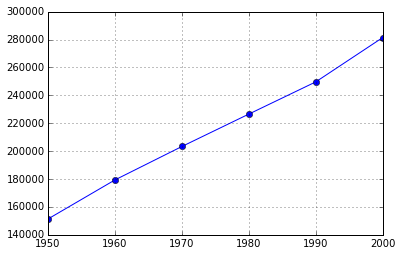

In [3]:
from __future__ import print_function, division

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1950, 1960, 1970, 1980, 1990, 2000])
y = np.array([151326, 179323, 203302, 226542, 249633, 281422])

yc = np.polyfit(x, y, 1)
print(yc)

plt.plot(x, y, 'o-')
plt.grid()
plt.show()

## Linear Algebra
**`scipy.linalg`** is a collection of commonly used linear algebra functions that operate on NumPy arrays. Functiontion to invert a matrix, find the determinant, solve a set of linear simultaneous equations, find eigenvalues and eigenvectors, perform matrix decomposition (LU, Cholesky, SVD, QR etc.) and higher level functions such as matrix exponential, matrix sine, matrix cosine are available in SciPy.

In [4]:
import scipy.linalg as LA

a = np.array([[10, -2, 4], [2, -8, 6], [3, -1, 4]], dtype=float)
x = np.array([2, -1, 4], dtype=float)
print(a)
print(x)
b = np.dot(a, x)
print(b)

[[ 10.  -2.   4.]
 [  2.  -8.   6.]
 [  3.  -1.   4.]]
[ 2. -1.  4.]
[ 38.  36.  23.]


In [5]:
print('NumPy Linear Algebra')
print(np.linalg.det(a))
print(np.linalg.norm(a))
print(np.linalg.solve(a, b))
print('\nSciPy Linear Algebra')
print(LA.det(a))
print(LA.norm(a))
print(LA.solve(a, b))

NumPy Linear Algebra
-192.0
15.8113883008
[ 2. -1.  4.]

SciPy Linear Algebra
-192.0
15.8113883008
[ 2. -1.  4.]


In [6]:
print('NumPy')
w, X = np.linalg.eig(a)
print('Eigenvalues', w)
print('Eigenvectors\n', X)
print('\nSciPy')
w, X = LA.eig(a)
print('Eigenvalues:', w)
print('Eigenvectors\n', X)

NumPy
Eigenvalues [ 11.1063283   2.3259842  -7.4323125]
Eigenvectors
 [[ 0.91140287  0.32829762 -0.10003187]
 [ 0.20707835 -0.42621529 -0.99313579]
 [ 0.35561687 -0.84294792 -0.06062117]]

SciPy
Eigenvalues: [ 11.1063283+0.j   2.3259842+0.j  -7.4323125+0.j]
Eigenvectors
 [[ 0.91140287  0.32829762 -0.10003187]
 [ 0.20707835 -0.42621529 -0.99313579]
 [ 0.35561687 -0.84294792 -0.06062117]]


In [7]:
k = np.array([[3, -1, 0], [-1, 2, -1], [0, -1, 1]], dtype=float)
m = np.diag([1.5, 1.5, 1.0])
print(k)
print(m)
D = np.dot(LA.inv(k), m)
print(D)
print(LA.det(D))
w, X = LA.eig(D)
print(w)
print(X)

[[ 3. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  1.]]
[[ 1.5  0.   0. ]
 [ 0.   1.5  0. ]
 [ 0.   0.   1. ]]
[[ 0.75  0.75  0.5 ]
 [ 0.75  2.25  1.5 ]
 [ 0.75  2.25  2.5 ]]
1.125
[ 4.46449359+0.j  0.39094581+0.j  0.64456060+0.j]
[[-0.22426813 -0.70908394 -0.58307119]
 [-0.59745382  0.59339611 -0.39230969]
 [-0.76990437 -0.38089504  0.71142188]]


In [8]:
print(np.sqrt(abs(w)))
print(X / X[0,:])
print(np.dot(X.T, np.dot(m, X)))

[ 2.11293483  0.6252566   0.80284532]
[[ 1.          1.          1.        ]
 [ 2.66401564 -0.83684889  0.67283325]
 [ 3.43296371  0.53716496 -1.22012867]]
[[  1.20362363e+00   3.88578059e-16  -1.11022302e-16]
 [  3.88578059e-16   1.42745948e+00  -2.77555756e-16]
 [  0.00000000e+00  -2.77555756e-16   1.24693945e+00]]


In [9]:
print(LA.eigvals(D))

[ 4.46449359+0.j  0.39094581+0.j  0.64456060+0.j]


In [22]:
print(LA.expm(D))

[[  7.00578382  14.37756209  12.1088343 ]
 [ 14.37756209  39.54659737  32.54081355]
 [ 18.16325145  48.81122032  43.70816984]]


## SciPy.Integrate - Solution of ODEs by Integration



### Trapezoidal and Simpson's Rules

Let us estimate the following integral

$$ I = \int_{0}^{0.8} 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$$

Let us use Simpson's 1/3 rule to estimate the inegral by dividing the interval into 2 equal divisions.

The answer from explicit integration is

$$ I = \left [ 0.2x + 12.5 x^2 - \frac{200}{3} x^3 + \frac{675}{4} x^4 - 180 x^5 + \frac{400}{6} x^6  \right]_{0}^{0.8} = 1.640533 $$

####Trapezoidal Rule

0.0 0.2
0.4 2.456
0.8 0.232


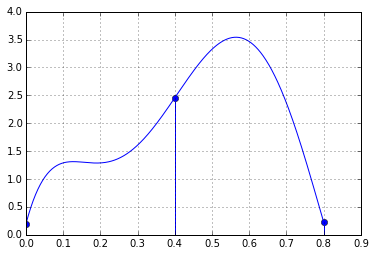

1.068800


In [28]:
from scipy.integrate import trapz

f = lambda x: 0.2 + 25*x -200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
#x = np.arange(0.0, 0.81, 0.4)
x = np.linspace(0.0, 0.8, 3)
y = f(x)
for xx, yy in zip(x, y):
    print(xx, yy)

xx = np.linspace(0, 0.8, 501)
yy = f(xx)

plt.stem(x, y)
plt.plot(xx, yy, 'b')
plt.grid()
plt.show()

I = trapz(y, x)
print("%.6f" % I)

The error is
$$ E_t = 1.640533 - 1.0688 = 0.57173 \qquad \varepsilon_t = 34.9\% $$
The estimated error is

$$ E_a = - \frac{(b - a)^3}{12 n^3} \bar{f}^{(2)}= - \frac{0.8^3}{12 \times 2^4} (-60) = 0.64 $$

#### Simpson's 1/3 Rule

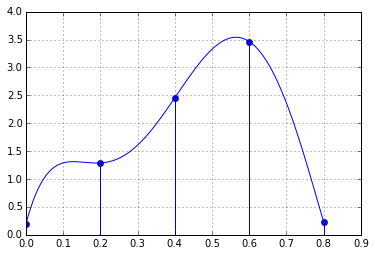

1.62346666667


In [27]:
from scipy.integrate import simps

#x = np.arange(0.0, 0.81, 0.2)
x = np.linspace(0.0, 0.8, 5)
y = f(x)
xx = np.linspace(0, 0.8, 501)
yy = f(xx)

plt.stem(x, y)
plt.plot(xx, yy, 'b')
plt.grid()
plt.show()

I = simps(y, x)
print(I)

The error is
$$ E_t = 1.640533 - 1.623467 = 0.017067 \qquad \varepsilon_t = 1.04\% $$
The estimated error is

$$ E_a = - \frac{(b - a)^5}{180 n^4} \bar{f}^{(4)} = - \frac{0.8^5}{180 \times 4^4} (-2400) = 0.017067 $$

### Quadrature
Calculation of definite integrals using quadrature rules

Let us calculate $I = \int_0^4 x^2 dx = \frac{1}{3}\left( 4^3 - 0^3 \right) = \frac{4^3}{3} = 21.333333333$

(21.333333333333336, 2.368475785867001e-13)
21.3333333333


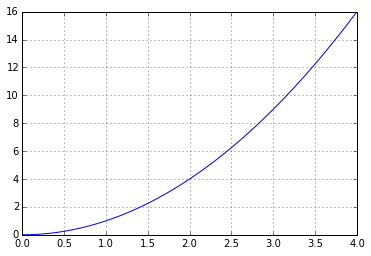

In [23]:
from scipy.integrate import quad, quadrature

x2 = lambda x: x**2

I = quad(x2, 0, 4)
print(I)
print(4.0**3 / 3.0)

xx = np.linspace(0.0, 4, 501)
yy = x2(xx)

plt.plot(xx, yy)
plt.grid()
plt.show()

In [24]:
I1 = quadrature(x2, 0, 4)
print(I1)

(21.333333333333332, 3.5527136788005009e-15)


### Example 1. First order ODE
Solve the first-order ODE $\dot{y}(t) = -5t y(t)$ for the initial condition $y(0)=10$ from $t=0 \text{ to } t=1.5$.

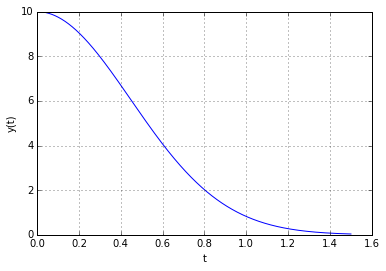

In [25]:
%matplotlib inline
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv(y, t):
    ydot = -5.0 * t * y[0]
    return ydot

tstart = 0
tend = 1.5
numint = 1000
t = np.linspace(tstart, tend, numint+1)
yinit = np.array([10.0])
y = odeint(deriv, yinit, t)

plt.plot(t, y[:, 0])
plt.grid()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Example 2. First Order ODE
Solve $\dot{y}(t) = y(t) + y(t)^3$, with $y(0) = 0.1$ from $t=0$ to $t=2$.

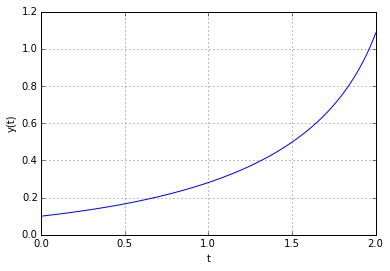

In [26]:
def deriv(y, t):
    ydot = np.array([y[0] + y[0]**3])
    return ydot

tstart = 0
tend = 2.0
numint = 1000
t = np.linspace(tstart, tend, numint+1)
yinit = np.array([0.1])
y = odeint(deriv, yinit, t)

plt.plot(t, y[:, 0])
plt.grid()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Example 3. First Order ODE
Solve $\dot{y}(t) = \sin(t) y(t)$, with $y(0) = 0.5$ from $t=0$ to $t=9$.

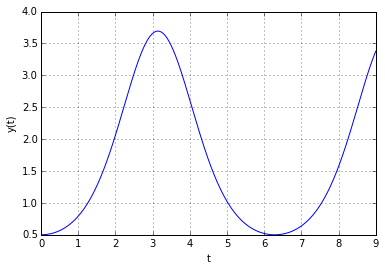

In [27]:
def deriv(y, t):
    ydot = np.array([np.sin(t) * y[0]])
    return ydot

tstart = 0
tend = 9.0
numint = 1000
t = np.linspace(tstart, tend, numint+1)
yinit = np.array([0.5])
y = odeint(deriv, yinit, t)

plt.plot(t, y[:, 0])
plt.grid()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Example 4. Second Order ODE
Solution of ODEs by integration for the initial conditions $x_0 = 1$ and $\dot{x}_0 = 0$.

$m \ddot{x}^2 + c \dot{x} + k x = 0$

$\ddot{x}^2 = - \frac{c}{m} \dot{x} - \frac{k}{m} x$

The above equation of motion can be written as a system of two first-order ODEs follows by letting $x_1 = x(t)$ and $x_2 = \dot{x}$:

$\dot{x}_1 = \dot{x} = x_2$

$\dot{x}_2 = \ddot{x} = - \frac{c}{m} \dot{x} - \frac{k}{m} x$

Let $m = 0.5$, $c = 0.4$ and $k = 4.0$.

In [28]:
m = 0.5; c = 0.4; k = 4.0
wn = np.sqrt(k / m)
print(wn)
ccr = 2.0 * np.sqrt(k*m)
xi = c / ccr
print(xi, xi < 1.0)

2.82842712475
0.141421356237 True


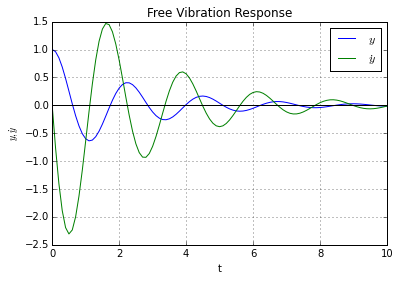

In [29]:
def calc_deriv(x, t, cm, km):
    return (x[1], -cm * x[1] - km * x[0])

cm = c / m
km = k / m

t = np.linspace(0, 10, 101)
x = odeint(calc_deriv, (1, 0), t, args=(cm, km))
plt.plot(t, x[:,0], label='$y$')
plt.plot(t, x[:,1], label='$\dot{y}$')
plt.grid()
plt.xlabel('t')
plt.ylabel('$y, \dot{y}$')
plt.title('Free Vibration Response')
plt.legend(loc='upper right')
plt.axhline(0, color='black')
plt.show()

# Statistics

In [30]:
from scipy import stats

np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
print(x.max(), x.min(), x.var())

5.26327732981 -3.78975572422 1.28899386208


In [17]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

(0.1050050642996483, 0.91639288974750344)

In [18]:
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500)
stats.ttest_ind(rvs1, rvs3)

(-5.63829996399945, 2.2348789362243764e-08)

In [19]:
stats.ks_2samp(rvs1, rvs2)

(0.056000000000000008, 0.40310260702007961)

## Signal Processing

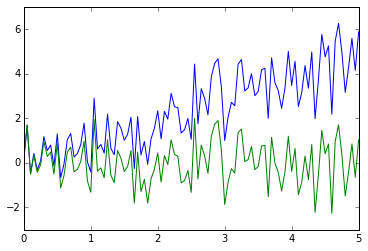

In [31]:
from scipy import signal

t = np.linspace(0, 5, 101)
x = t + np.random.normal(size=101)

plt.plot(t, x)
plt.plot(t, signal.detrend(x))
plt.show()

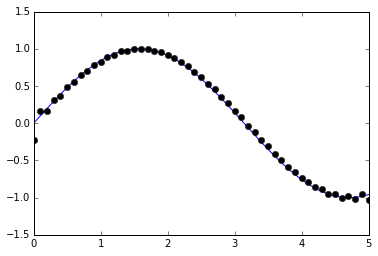

In [32]:
t = np.linspace(0, 5, 101)
x = np.sin(t)

plt.plot(t, x)
plt.plot(t[::2], signal.resample(x, 51), 'ko')
plt.show()